### The challenge is to predict the probability of loan disbursal for the customers of happy customer bank

http://datahack.analyticsvidhya.com/contest/data-hackathon-3x

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
import datetime
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.decomposition import PCA
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
#open train set
train_set_path = "./data/Train.csv"
train_set = pd.read_csv(train_set_path, encoding='latin1')
train_set.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


##### We will be looking for numerical an categorical variables

In [3]:
target = 'Disbursed'
num_features = []
cat_features = []

In [4]:
#open train set
test_set_path = "./data/Test.csv"
test_set = pd.read_csv(test_set_path, encoding='latin1')
test_set.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
0,ID000026A10,Male,Dehradun,21500,03-Apr-87,05-May-15,100000.0,3.0,0.0,APTARA INC,...,100000.0,3.0,20.0,1000.0,2649.39,N,Web-browser,B,S122,3
1,ID000054C40,Male,Mumbai,42000,12-May-80,01-May-15,0.0,0.0,0.0,ATUL LTD,...,690000.0,5.0,24.0,13800.0,19849.90,Y,Mobile,C,S133,5
2,ID000066O10,Female,Jaipur,10000,19-Sep-89,01-May-15,300000.0,2.0,0.0,SHAREKHAN PVT LTD,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,1
3,ID000110G00,Female,Chennai,14650,15-Aug-91,01-May-15,0.0,0.0,0.0,MAERSK GLOBAL SERVICE CENTRES,...,NaN,NaN,NaN,NaN,NaN,N,Mobile,C,S133,1
4,ID000113J30,Male,Chennai,23400,22-Jul-87,01-May-15,100000.0,1.0,5000.0,SCHAWK,...,100000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S143,1


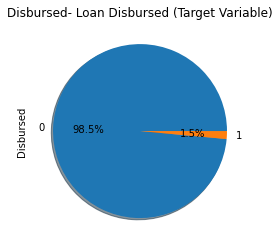

In [5]:
train_set['Disbursed'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title="Disbursed- Loan Disbursed (Target Variable)")

#### unbalanced dataset!

## Input variables analysis

## Gender

Text(0.5, 1.0, 'test set gender distribution')

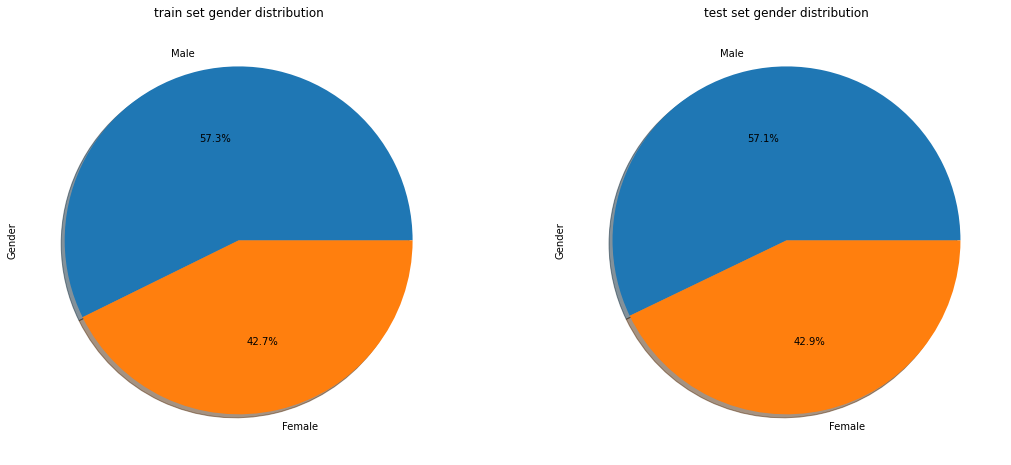

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train_set['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title("train set gender distribution")

test_set['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
ax[1].set_title("test set gender distribution")

###### Gender distributions in train-test sets are the same

In [7]:
pd.isnull(train_set['Gender']).value_counts()

False    87020
Name: Gender, dtype: int64

In [8]:
cat_features.append('Gender')

## City

In [9]:
print("Counting of unique values in Cities")
print(train_set.City.value_counts())

Counting of unique values in Cities
Delhi        12527
Bengaluru    10824
Mumbai       10795
Hyderabad     7272
Chennai       6916
             ...  
Dhalai           1
Siruguppa        1
Champawat        1
Pulwama          1
Kargil           1
Name: City, Length: 697, dtype: int64


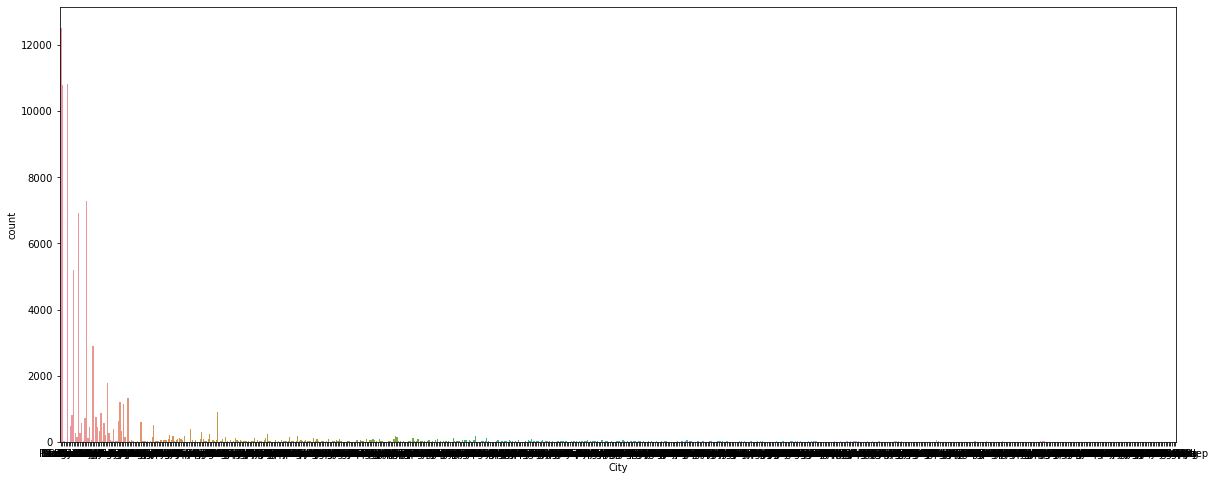

In [10]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
plt.rc('xtick',labelsize=8)
sns.countplot(x ="City", data = train_set)
plt.show()

In [11]:
print("How many unique values are in Cities column:")
print(len(train_set.City.value_counts()))

How many unique values are in Cities column:
697


In [12]:
print("Counting of unique values in Cities")
print(train_set.City.value_counts()[:10])

Counting of unique values in Cities
Delhi        12527
Bengaluru    10824
Mumbai       10795
Hyderabad     7272
Chennai       6916
Pune          5207
Kolkata       2888
Ahmedabad     1788
Jaipur        1331
Gurgaon       1212
Name: City, dtype: int64


In [13]:
print("Counting of unique values in Cities")
print(test_set.City.value_counts()[:10])

Counting of unique values in Cities
Delhi        5409
Bengaluru    4698
Mumbai       4630
Hyderabad    3138
Chennai      2979
Pune         2220
Kolkata      1394
Ahmedabad     740
Jaipur        561
Gurgaon       531
Name: City, dtype: int64


In [14]:
under_top_10_unique_cities = train_set.City.value_counts()[10:].index.tolist()

#### There is too many cathegories in <b>City</b> column 

In [15]:
train_set['City'].replace(under_top_10_unique_cities,'Other', inplace = True)
train_set['City'].value_counts()

Other        25257
Delhi        12527
Bengaluru    10824
Mumbai       10795
Hyderabad     7272
Chennai       6916
Pune          5207
Kolkata       2888
Ahmedabad     1788
Jaipur        1331
Gurgaon       1212
Name: City, dtype: int64

In [16]:
test_set['City'].replace(under_top_10_unique_cities,'Other', inplace = True)

#### Missing values

In [17]:
pd.isnull(train_set['City']).value_counts()

False    86017
True      1003
Name: City, dtype: int64

In [18]:
train_set['City'].fillna("Other", inplace = True)
test_set['City'].fillna("Other", inplace = True)

In [19]:
cat_features.append('City')

### Monthly_Income - Monthly Income in rupees

Text(0.5, 0, 'Monthly_Income')

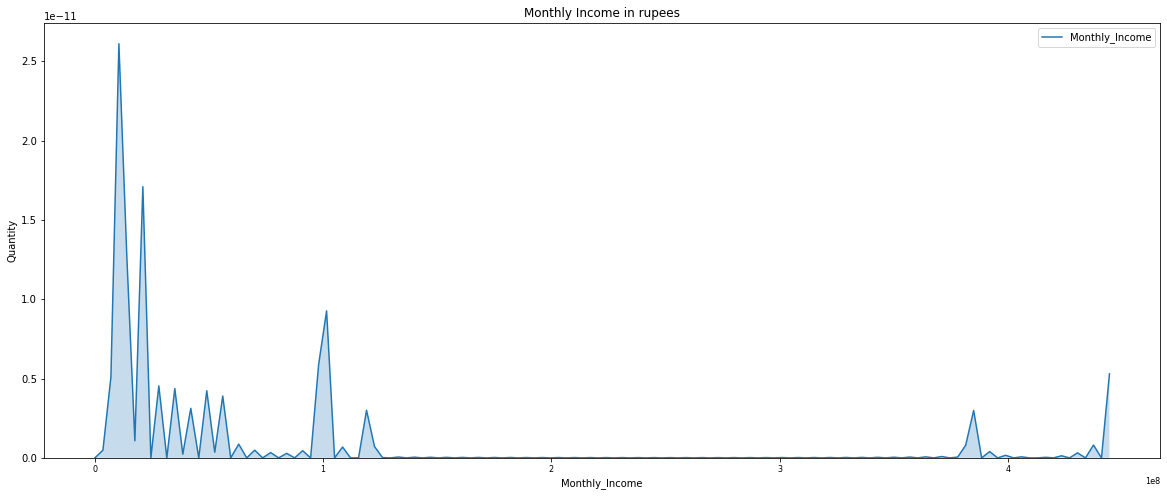

In [20]:
fig = plt.figure(figsize=(20,8))
sns.kdeplot(data=train_set['Monthly_Income'], shade=True)
plt.title("Monthly Income in rupees")
plt.ylabel('Quantity')
plt.xlabel('Monthly_Income')

Average monthy income in TRAIN set : 58850.0
Average monthy income in TEST set : 39803.0 ; difference:  19047.0


Text(0.5, 0, 'Monthly_Income')

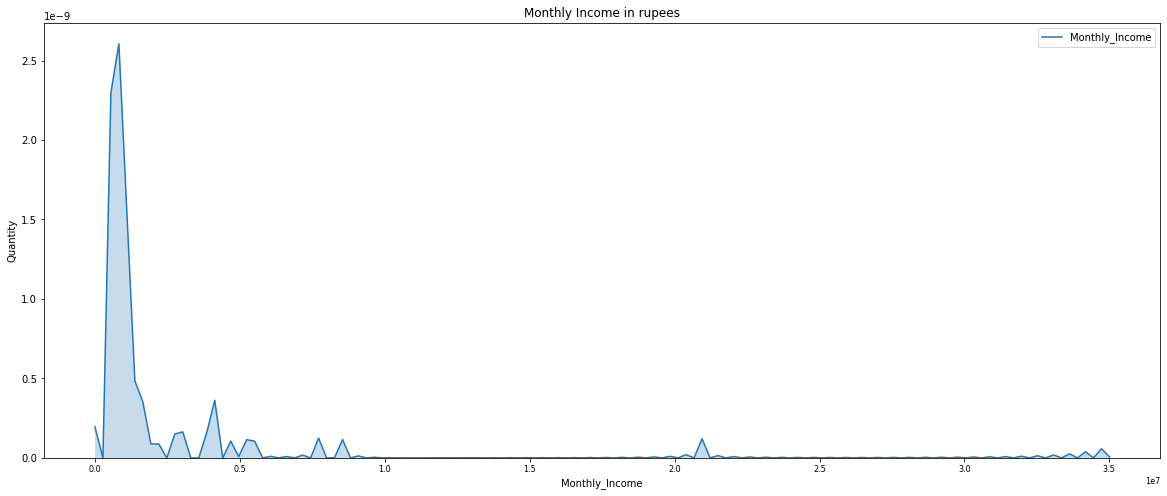

In [21]:
print("Average monthy income in TRAIN set :", np.round(train_set['Monthly_Income'].mean(),0))
print("Average monthy income in TEST set :", 
      np.round(test_set['Monthly_Income'].mean(),0), 
      "; difference: ", 
      np.round(train_set['Monthly_Income'].mean(),0) - np.round(test_set['Monthly_Income'].mean(),0)) 
fig = plt.figure(figsize=(20,8))
sns.kdeplot(data=test_set['Monthly_Income'], shade=True)
plt.title("Monthly Income in rupees")
plt.ylabel('Quantity')
plt.xlabel('Monthly_Income')

#### Missing income

In [22]:
pd.isnull(train_set['Monthly_Income']).value_counts()

False    87020
Name: Monthly_Income, dtype: int64

In [23]:
num_features.append('Monthly_Income')

### DOB - Date of Birth

In [24]:
pd.isnull(train_set['DOB']).value_counts()

False    87020
Name: DOB, dtype: int64

In [25]:
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [26]:
train_set['Age']=train_set["DOB"].apply(lambda x: from_dob_to_age(datetime.datetime.strptime(x, '%d-%b-%y')))

In [27]:
train_set.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Age
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,N,Web-browser,G,S122,1,0,0,43
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,NaN,6762.9,N,Web-browser,G,S122,3,0,0,35
2,ID000007H20,Male,Other,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,N,Web-browser,B,S143,1,0,0,39
3,ID000008I30,Male,Other,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,N,Web-browser,B,S143,3,0,0,33
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,N,Web-browser,B,S134,3,1,0,37


In [28]:
num_features.append('Age')

### Lead_Creation_Date - Lead Created on date

In [29]:
pd.isnull(train_set['Lead_Creation_Date']).value_counts()

False    87020
Name: Lead_Creation_Date, dtype: int64

In [30]:
train_set['Yrs_Lead_Creation_Date']=train_set["Lead_Creation_Date"].apply(lambda x: from_dob_to_age(datetime.datetime.strptime(x, '%d-%b-%y')))

In [31]:
num_features.append('Yrs_Lead_Creation_Date')

#### Date of applying seems to be meaningless variable to the prediction:

In [32]:
train_set = train_set.drop(['Lead_Creation_Date'], axis=1)

### Loan_Amount_Applied - Loan Amount Requested (INR)

##### INR – INDIAN RUPEE

Loan Amount Requested (INR) : 230251.0


Text(0.5, 0, 'Loan_Amount_Applied')

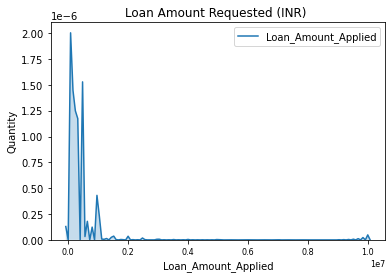

In [33]:
print("Loan Amount Requested (INR) :", np.round(train_set['Loan_Amount_Applied'].mean(),0))
sns.kdeplot(data=train_set['Loan_Amount_Applied'], shade=True)
plt.title("Loan Amount Requested (INR) ")
plt.ylabel('Quantity')
plt.xlabel('Loan_Amount_Applied')

In [34]:
pd.isnull(train_set['Loan_Amount_Applied']).value_counts()

False    86949
True        71
Name: Loan_Amount_Applied, dtype: int64

#### I'll drop missing values, beacuse it's seems to be key variable

In [35]:
train_set.dropna(subset=['Loan_Amount_Applied'], inplace=True)

In [36]:
pd.isnull(train_set['Loan_Amount_Applied']).value_counts()

False    86949
Name: Loan_Amount_Applied, dtype: int64

In [37]:
num_features.append('Loan_Amount_Applied')

### Loan_Tenure_Applied - Loan Tenure Requested (in years)

In [38]:
pd.isnull(train_set['Loan_Tenure_Applied']).value_counts()

False    86949
Name: Loan_Tenure_Applied, dtype: int64

Loan Tenure Requested (in years) : 2.0


Text(0.5, 0, 'Loan_Tenure_Applied')

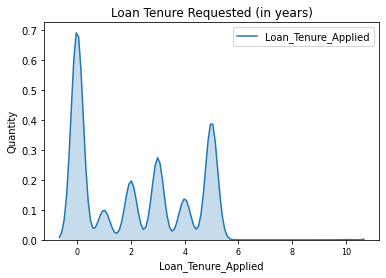

In [39]:
print("Loan Tenure Requested (in years) :", np.round(train_set['Loan_Tenure_Applied'].mean(),0))
sns.kdeplot(data=train_set['Loan_Tenure_Applied'], shade=True)
plt.title("Loan Tenure Requested (in years)")
plt.ylabel('Quantity')
plt.xlabel('Loan_Tenure_Applied')

In [40]:
num_features.append('Loan_Tenure_Applied')

### Existing_EMI - EMI of Existing Loans (INR)

##### What Is an Equated Monthly Installment (EMI)?
An equated monthly installment (EMI) is a fixed payment amount made by a borrower to a lender at a specified date each calendar month. Equated monthly installments are applied to both interest and principal each month so that over a specified number of years, the loan is paid off in full.

EMI of Existing Loans (INR) : 3696.0


Text(0.5, 0, 'Existing_EMI')

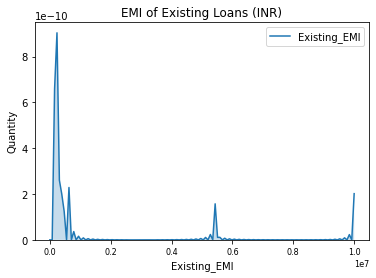

In [41]:
print("EMI of Existing Loans (INR) :", np.round(train_set['Existing_EMI'].mean(),0))
sns.kdeplot(data=train_set['Existing_EMI'], shade=True)
plt.title("EMI of Existing Loans (INR)")
plt.ylabel('Quantity')
plt.xlabel('Existing_EMI')

In [42]:
pd.isnull(train_set['Loan_Tenure_Applied']).value_counts()

False    86949
Name: Loan_Tenure_Applied, dtype: int64

In [43]:
num_features.append('Loan_Tenure_Applied')

### Employer_Name - Employer Name

In [44]:
pd.isnull(train_set['Employer_Name']).value_counts()

False    86949
Name: Employer_Name, dtype: int64

In [45]:
train_set['Employer_Name'].unique()

array(['CYBOSOL', 'TATA CONSULTANCY SERVICES LTD (TCS)',
       'ALCHEMIST HOSPITALS LTD', ..., 'UTTAM VALUE STEEL LTD,WARDHA',
       'MAYO COLLEGE', 'BANGALORE INSTITUTE OF TECHNOLOGY'], dtype=object)

In [46]:
(train_set['Employer_Name'] == '0').sum()

4914

In [47]:
train_set['Employer_Name'].value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
                                                ... 
JHARKHAND WRD                                      1
VISHAL MADHUKAR MADAVI                             1
WESTERN RAILWAY                                    1
SHIVASHAKTI BIO TECHNOLOGIES LTD                   1
RAM LAL RAM CHANDRA INDIA LTD                      1
Name: Employer_Name, Length: 43567, dtype: int64

##### There is missing values in Employer Name set as '0', I'll change it to others

In [48]:
train_set['Employer_Name'].replace('0','Other', inplace = True)

In [49]:
under_top_10_Employer_Name = train_set.Employer_Name.value_counts()[10:].index.tolist()
train_set['Employer_Name'].replace(under_top_10_Employer_Name,'Other', inplace = True)
test_set['Employer_Name'].replace(under_top_10_Employer_Name,'Other', inplace = True)

In [50]:
train_set['Employer_Name'].value_counts()

Other                                           84330
TATA CONSULTANCY SERVICES LTD (TCS)               550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD      404
ACCENTURE SERVICES PVT LTD                        324
GOOGLE                                            301
HCL TECHNOLOGIES LTD                              250
ICICI BANK LTD                                    239
INDIAN AIR FORCE                                  191
INFOSYS TECHNOLOGIES                              181
GENPACT                                           179
Name: Employer_Name, dtype: int64

In [51]:
cat_features.append('Employer_Name')

### Salary_Account- Salary account with Bank

In [52]:
pd.isnull(train_set['Salary_Account']).value_counts()

False    75256
True     11693
Name: Salary_Account, dtype: int64

In [53]:
train_set['Salary_Account'].fillna('Other', inplace = True)
train_set['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Other                                              11693
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank           

In [54]:
under_top_20_unique_Salary_Account = train_set.Salary_Account.value_counts()[20:].index.tolist()
train_set['Salary_Account'].replace(under_top_20_unique_Salary_Account,'Other', inplace = True)
test_set['Salary_Account'].replace(under_top_20_unique_Salary_Account,'Other', inplace = True)
train_set['Salary_Account'].value_counts()

Other                      18696
HDFC Bank                  17695
ICICI Bank                 13636
State Bank of India        11843
Axis Bank                   8783
Citibank                    2376
Kotak Bank                  2067
IDBI Bank                   1550
Punjab National Bank        1201
Bank of India               1170
Bank of Baroda              1126
Standard Chartered Bank      995
Canara Bank                  990
Union Bank of India          951
Yes Bank                     779
ING Vysya                    678
Corporation bank             649
Indian Overseas Bank         612
State Bank of Hyderabad      597
Indian Bank                  555
Name: Salary_Account, dtype: int64

In [55]:
cat_features.append('Salary_Account')

### Mobile_Verified - Mobile Verified (Y/N)

In [56]:
pd.isnull(train_set['Mobile_Verified']).value_counts()

False    86949
Name: Mobile_Verified, dtype: int64

In [57]:
train_set['Mobile_Verified'].value_counts()

Y    56442
N    30507
Name: Mobile_Verified, dtype: int64

In [58]:
cat_features.append('Mobile_Verified')

### Var5- Continuous classified variable

In [59]:
pd.isnull(train_set['Var5']).value_counts()

False    86949
Name: Var5, dtype: int64

In [60]:
train_set['Var5'].value_counts()

0     29071
1     12232
3      6757
11     5201
2      4481
14     3660
15     3507
12     2983
13     2616
8      2508
10     2425
9      2275
16     2092
4      1813
17     1689
7      1489
6       982
5       975
18      193
Name: Var5, dtype: int64

In [61]:
num_features.append('Var5')

### Var1- Categorical variable with multiple levels

In [62]:
pd.isnull(train_set['Var1']).value_counts()

False    86949
Name: Var1, dtype: int64

In [63]:
train_set['Var1'].value_counts()

HBXX    59252
HBXC     9005
HBXB     4472
HAXA     2909
HBXA     2112
HAXB     2011
HBXD     1962
HAXC     1534
HBXH      969
HCXF      721
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [64]:
cat_features.append('Var1')

### Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility

In [65]:
pd.isnull(train_set['Loan_Amount_Submitted']).value_counts()

False    52371
True     34578
Name: Loan_Amount_Submitted, dtype: int64

In [66]:
train_set['Loan_Amount_Submitted'].value_counts()

100000.0     6876
200000.0     6581
300000.0     5379
500000.0     4845
1000000.0    1643
             ... 
2470000.0       1
1660000.0       1
1890000.0       1
1990000.0       1
1900000.0       1
Name: Loan_Amount_Submitted, Length: 203, dtype: int64

In [67]:
# fill missing values with mean column values
train_set['Loan_Amount_Submitted'].fillna(train_set['Loan_Amount_Submitted'].mean(), inplace=True)

In [68]:
num_features.append('Loan_Amount_Submitted')

### Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)

In [69]:
pd.isnull(train_set['Loan_Tenure_Submitted']).value_counts()

False    52371
True     34578
Name: Loan_Tenure_Submitted, dtype: int64

In [70]:
# fill missing values with mean column values
train_set['Loan_Tenure_Submitted'].fillna(train_set['Loan_Tenure_Submitted'].mean(), inplace=True)

In [71]:
num_features.append('Loan_Tenure_Submitted')

### Interest_Rate- Interest Rate of Submitted Loan Amount

In [72]:
pd.isnull(train_set['Interest_Rate']).value_counts()

True     59252
False    27697
Name: Interest_Rate, dtype: int64

Interest_Rate- Interest Rate of Submitted Loan Amount : 19.0


Text(0.5, 0, 'Interest_Rate')

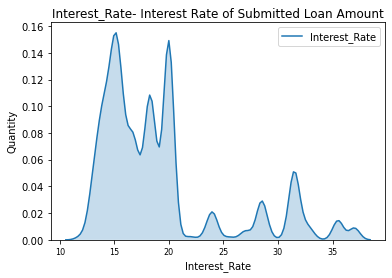

In [73]:
print("Interest_Rate- Interest Rate of Submitted Loan Amount :", np.round(train_set['Interest_Rate'].mean(),0))
sns.kdeplot(data=train_set['Interest_Rate'], shade=True)
plt.title("Interest_Rate- Interest Rate of Submitted Loan Amount")
plt.ylabel('Quantity')
plt.xlabel('Interest_Rate')

In [74]:
# fill missing values with mean column values
train_set['Interest_Rate'].fillna(train_set['Interest_Rate'].mean(), inplace=True)

In [75]:
num_features.append('Interest_Rate')

### Processing_Fee- Processing Fee of Submitted Loan Amount (INR)

In [76]:
pd.isnull(train_set['Processing_Fee']).value_counts()

True     59558
False    27391
Name: Processing_Fee, dtype: int64

Processing_Fee- Processing Fee of Submitted Loan Amount (INR): 5133.0


Text(0.5, 0, 'Processing_Fee')

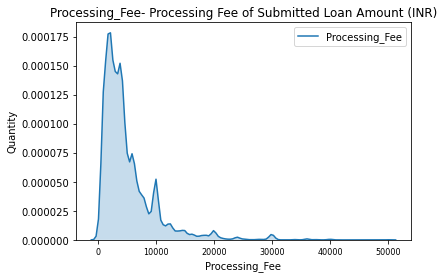

In [77]:
print("Processing_Fee- Processing Fee of Submitted Loan Amount (INR):", np.round(train_set['Processing_Fee'].mean(),0))
sns.kdeplot(data=train_set['Processing_Fee'], shade=True)
plt.title("Processing_Fee- Processing Fee of Submitted Loan Amount (INR)")
plt.ylabel('Quantity')
plt.xlabel('Processing_Fee')

In [78]:
# fill missing values with mean column values
train_set['Processing_Fee'].fillna(train_set['Processing_Fee'].mean(), inplace=True)

In [79]:
num_features.append('Processing_Fee')

### EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)

In [80]:
pd.isnull(train_set['EMI_Loan_Submitted']).value_counts()

True     59252
False    27697
Name: EMI_Loan_Submitted, dtype: int64

EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR): 10999.0


Text(0.5, 0, 'EMI_Loan_Submitted')

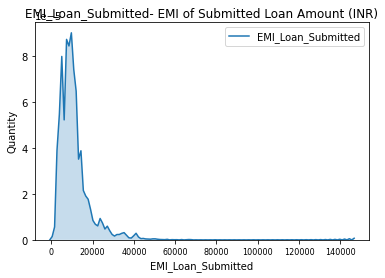

In [81]:
print("EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR):", np.round(train_set['EMI_Loan_Submitted'].mean(),0))
sns.kdeplot(data=train_set['EMI_Loan_Submitted'], shade=True)
plt.title("EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)")
plt.ylabel('Quantity')
plt.xlabel('EMI_Loan_Submitted')

In [82]:
# fill missing values with mean column values
train_set['EMI_Loan_Submitted'].fillna(train_set['EMI_Loan_Submitted'].mean(), inplace=True)

In [83]:
num_features.append('EMI_Loan_Submitted')

### Filled_Form- Filled Application form post quote

##### Filled Form of applying seems to be meaningless variable to the prediction:

In [84]:
train_set = train_set.drop(['Filled_Form'], axis=1)

### Device_Type- Device from which application was made (Browser/ Mobile)

##### Device from someone was applying seems to be meaningless variable to the prediction:

In [85]:
train_set = train_set.drop(['Device_Type'], axis=1)

### Var2- Categorical Variable with multiple Levels

In [86]:
pd.isnull(train_set['Var2']).value_counts()

False    86949
Name: Var2, dtype: int64

In [87]:
train_set['Var2'].value_counts()

B    37276
G    32967
C    14210
E     1315
D      632
F      544
A        5
Name: Var2, dtype: int64

In [88]:
cat_features.append('Var2')

### Source- Categorical Variable with multiple Levels

In [89]:
pd.isnull(train_set['Source']).value_counts()

False    86949
Name: Source, dtype: int64

In [90]:
train_set['Source'].value_counts()

S122    38500
S133    29884
S159     5599
S143     4330
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      649
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S136        3
S138        3
S139        3
S129        3
S135        2
S125        1
S154        1
S140        1
S130        1
Name: Source, dtype: int64

##### Source of applying seems to be meaningless variable to the prediction:

In [91]:
train_set = train_set.drop(['Source'], axis=1)

### Var4- Categorical Variable with multiple Levels

In [92]:
train_set['Var4'].value_counts()

3    25244
1    23891
5    20242
4     6573
2     5931
0     2545
7     2291
6      232
Name: Var4, dtype: int64

In [93]:
cat_features.append('Var4')

### LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)

In [94]:
train_set['LoggedIn'].value_counts()

0    84401
1     2548
Name: LoggedIn, dtype: int64

### Disbursed- Loan Disbursed (Target Variable)

In [95]:
train_set['Disbursed'].value_counts()

0    85678
1     1271
Name: Disbursed, dtype: int64

In [96]:
train_set.isnull().sum()

ID                        0
Gender                    0
City                      0
Monthly_Income            0
DOB                       0
Loan_Amount_Applied       0
Loan_Tenure_Applied       0
Existing_EMI              0
Employer_Name             0
Salary_Account            0
Mobile_Verified           0
Var5                      0
Var1                      0
Loan_Amount_Submitted     0
Loan_Tenure_Submitted     0
Interest_Rate             0
Processing_Fee            0
EMI_Loan_Submitted        0
Var2                      0
Var4                      0
LoggedIn                  0
Disbursed                 0
Age                       0
Yrs_Lead_Creation_Date    0
dtype: int64

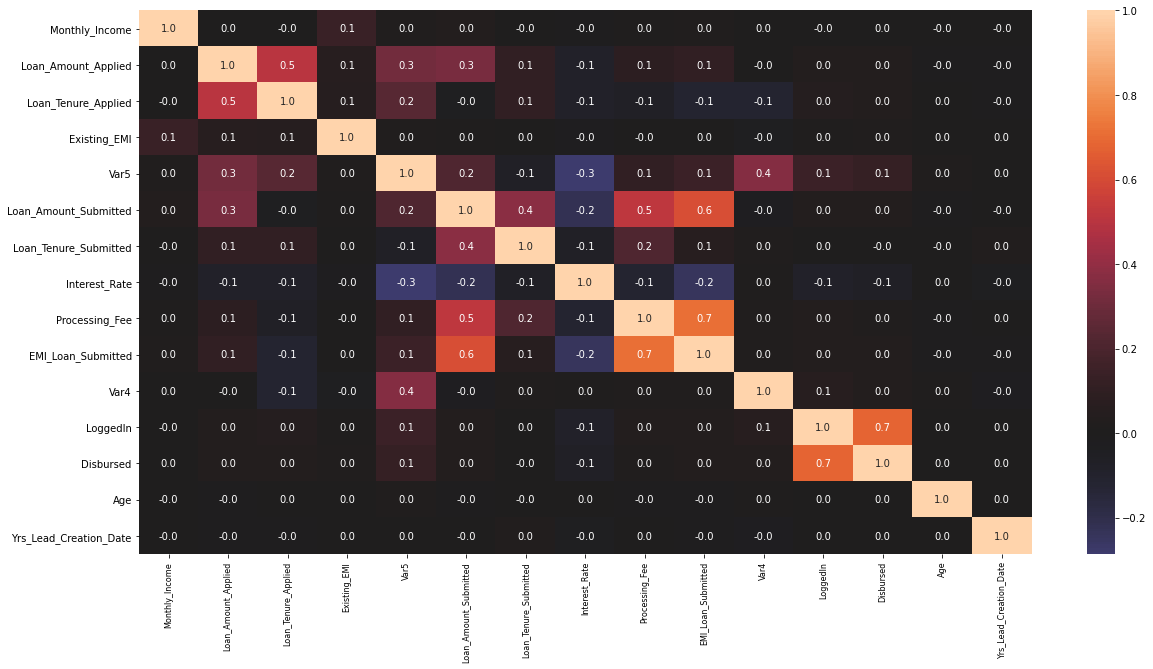

In [97]:
plt.subplots(figsize=(20, 10))
sns.heatmap(train_set.corr(),  annot=True, fmt='.1f', center=0)
plt.show()

In [98]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

In [99]:
encoder = OneHotEncoder()
encoder_cols = encoder.fit_transform(train_set[cat_features])

In [100]:
# Add one-hot encoded columns to numerical features and target column
train_set = pd.concat([pd.concat([train_set[num_features], encoder_cols], axis=1), train_set[target]], axis=1)

In [101]:
features = train_set.columns.tolist()
features.remove(target)
X = train_set[features]
y = train_set[target]

In [102]:
def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        
        #split dataset into train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, 
                                                            stratify=y)

        # Fit the classifier to the data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show()

In [103]:
def GridSearch(param, estimator, X=X, y=y):
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, grid_rf_predictions))

In [104]:
def CVmodel(nFolds = 5, randomState=2020, features=features, lin_reg = False, lin_reg_without_fi = False,
            cutoff=0.5, debug= False, model = SVC(), df = train_set, pipeline = False):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    
    # predictions for individual folds
    predictions = []

    # the index in the original file
    indices = []
    true=[]
    
    if lin_reg:
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            # preds = model.predict_proba(df.iloc[test][features])[:,1]
            preds, y_test = model.predict(df.iloc[test][features], round(cutoff,1))
            
            # information about predictions for this fold
            predictions.append(preds.tolist().copy())
            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
            
            true = (df.iloc[test][target]==1)
            if(lin_reg_without_fi == False):
                feature_importance = model.coef_
        if(lin_reg_without_fi):
            return predictions, indices, true
            
        return predictions, indices, feature_importance, true
        
        
    if(pipeline):
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            preds = model.predict_proba(df.iloc[test][features])[:,1]

            # information about predictions for this fold
            predictions.append(preds.tolist().copy())

            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
        
        return predictions, indices, true
        
    for train, test in kf.split(df.index.values):
        if debug:
            print(model)
        model.fit(df.iloc[train][features], df.iloc[train][target])

        # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
        preds = model.predict_proba(df.iloc[test][features])[:,1]

        # information about predictions for this fold
        predictions.append(preds.tolist().copy())

        # indexed in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())

        true.append(df.iloc[test][target]==1)

        feature_importance = model.feature_importances_
        
    return predictions, indices, feature_importance, true

In [105]:
param = {'max_depth': [10, 50, 100],
         'n_estimators': [100, 500],
         'max_features': [10 , 20]}

GridSearch(param = param, estimator = RandomForestClassifier())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21422
           1       0.00      0.00      0.00       316

    accuracy                           0.99     21738
   macro avg       0.49      0.50      0.50     21738
weighted avg       0.97      0.99      0.98     21738



/Users/ola/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ola/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ola/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
param = {'max_depth': [2, 5],
         'n_estimators': [100],
         'max_features': [5, 10],
         'min_samples_split': [10, 30]}

GridSearch(param=param, estimator=RandomForestClassifier())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 2, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21422
           1       0.00      0.00      0.00       316

    accuracy                           0.99     21738
   macro avg       0.49      0.50      0.50     21738
weighted avg       0.97      0.99      0.98     21738



/Users/ola/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ola/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ola/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


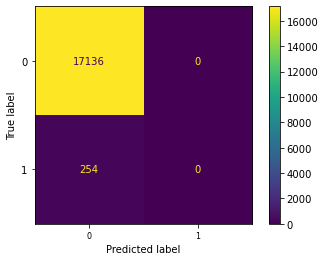

In [107]:
#Random Forest model 
rand_forest = RandomForestClassifier(random_state=2020, n_jobs=-1, n_estimators=100, 
                                 max_depth=50, max_features=10, min_samples_split=30)

ConfusionMatrix(classifier=rand_forest, confusionMatrix=False)

In [108]:
rand_forest = RandomForestClassifier(random_state=2020, n_jobs=-1, n_estimators=100, 
                                 max_depth=50, max_features=10, min_samples_split=30)

predictions, indices, feature_importance, true = CVmodel(model=rand_forest)

random_forest = {
    "name":"Random Forest",
    "predictions": predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true":true
}

In [109]:
# open the file for binary writing using "with"
with open("models_results/random_forest.p", "wb") as fp:
    pickle.dump(random_forest, fp)

## improving the quality of classification of models built on unsustainable training sets

In [110]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Apply neighbourhood cleaning rule
ncl = NeighbourhoodCleaningRule(return_indices=True)
X_resampled, y_resampled, idx_resampled = ncl.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

TypeError: __init__() got an unexpected keyword argument 'return_indices'